<a href="https://colab.research.google.com/github/sanjaymaharja/Assignment-1-Employee-Productivity-Wellness-Insights-Tool/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#load dataset
import pandas as pd
df = pd.read_csv("assignment1_dataset.csv")

#preview first five rows
df.head()

#print dataset info, data types, and summary statistics
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   EmployeeID           20 non-null     object
 1   Gender               20 non-null     object
 2   Age                  20 non-null     int64 
 3   WorkHours            20 non-null     int64 
 4   SleepHours           20 non-null     int64 
 5   AttendanceRate       20 non-null     int64 
 6   PreviousPerformance  20 non-null     int64 
 7   EducationLevel       20 non-null     object
 8   RemoteWork           20 non-null     object
 9   ProductivityScore    20 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 1.7+ KB


,EmployeeID,Gender,Age,WorkHours,SleepHours,AttendanceRate,PreviousPerformance,EducationLevel,RemoteWork,ProductivityScore
count,20,20,20.000000,20.000000,20.00000,20.00000,20.000000,20,20,20.000000
unique,20,2,NaN,NaN,NaN,NaN,NaN,4,2,NaN
top,E001,Male,NaN,NaN,NaN,NaN,NaN,Bachelor,Yes,NaN
freq,1,10,NaN,NaN,NaN,NaN,NaN,7,10,NaN
mean,NaN,NaN,35.550000,8.200000,6.65000,88.75000,81.800000,NaN,NaN,84.550000
std,NaN,NaN,6.984758,1.399248,1.03999,6.19741,8.351489,NaN,NaN,6.723682
min,NaN,NaN,25.000000,6.000000,5.00000,75.00000,65.000000,NaN,NaN,72.000000
25%,NaN,NaN,29.750000,7.000000,6.00000,85.00000,76.500000,NaN,NaN,79.750000
50%,NaN,NaN,35.500000,8.000000,7.00000,90.00000,84.000000,NaN,NaN,85.500000
75%,NaN,NaN,41.000000,9.000000,7.25000,93.25000,88.250000,NaN,NaN,88.750000


In [ ]:
#Data cleaning
#check for missing values
df.isnull().sum()

,0
EmployeeID,0
Gender,0
Age,0
WorkHours,0
SleepHours,0
AttendanceRate,0
PreviousPerformance,0
EducationLevel,0
RemoteWork,0
ProductivityScore,0


In [ ]:
#fill missing workhour with mean
df['WorkHours'] = df['WorkHours'].fillna(df['WorkHours'].mean())

#fill missing EducationLevel with the mode
df['EducationLevel']= df['EducationLevel'].fillna(df['EducationLevel'].mode())

#remove duplicate row if any
df = df.drop_duplicates()

In [ ]:
#Feature Engineering

#Create WellnessIndex = WorkHours*SleepHours
df['WellnessIndex'] = df['WorkHours']* df['SleepHours']

In [ ]:
#Create AttendanceCategory:
def attendance_category(rate):
  if rate > 90:
    return 'High'
  elif rate >=75:
    return 'Medium'
  else:
    return 'Low'

df['AttendanceCategory']= df['AttendanceRate'].apply(attendance_category)

In [ ]:
#Encoding and Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Encode Gender and EducationLevel
le = LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
df['EducationLevel']= le.fit_transform(df['EducationLevel'])

#convert Remotework (Yes/No) into numerical form
df['RemoteWork'] =df['RemoteWork'].map({'Yes':1, 'No':0})

#Scale WorkHours and AttendanceRate
scaler = StandardScaler()
df[['WorkHours', 'AttendanceRate']] = scaler.fit_transform(df[['WorkHours', 'AttendanceRate']])

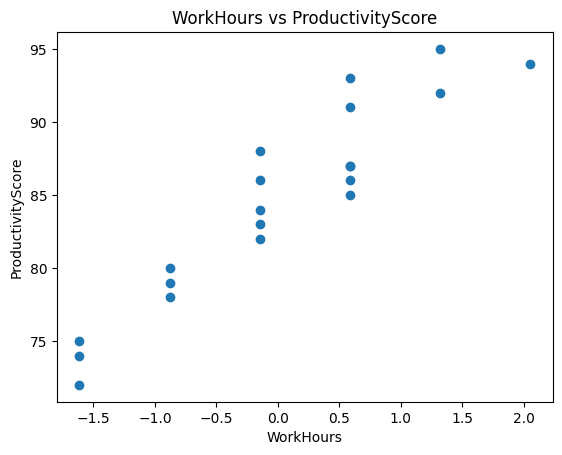

In [ ]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.scatter(df['WorkHours'], df['ProductivityScore'])
plt.xlabel('WorkHours')
plt.ylabel('ProductivityScore')
plt.title('WorkHours vs ProductivityScore')
plt.show()

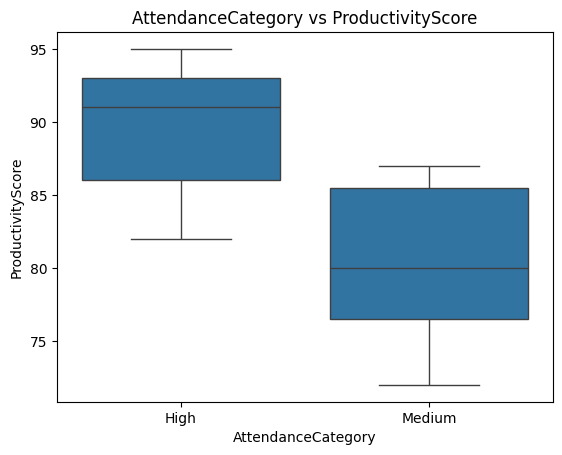

In [ ]:
plt.figure()
sns.boxplot(x='AttendanceCategory', y='ProductivityScore', data=df)
plt.title('AttendanceCategory vs ProductivityScore')
plt.show()

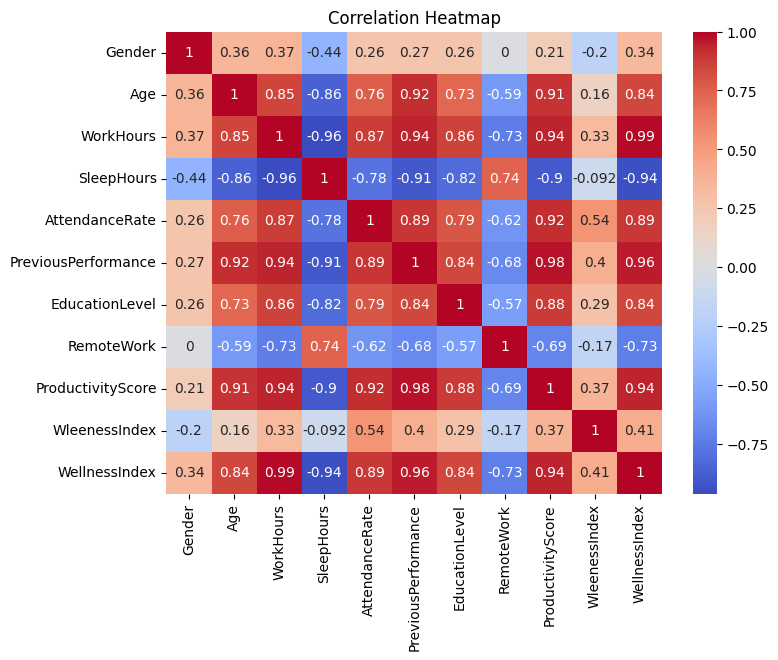

In [ ]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()


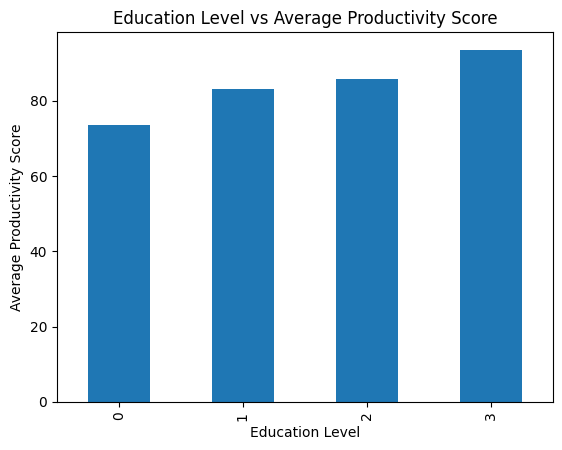

In [ ]:
plt.figure()
df.groupby('EducationLevel')['ProductivityScore'].mean().plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Average Productivity Score')
plt.title('Education Level vs Average Productivity Score')
plt.show()

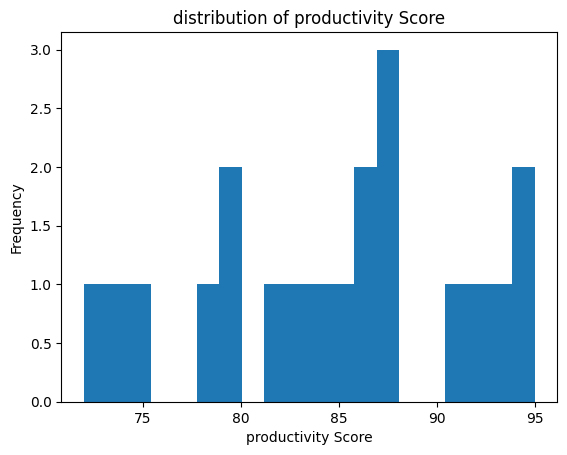

In [ ]:
plt.figure()
plt.hist(df['ProductivityScore'], bins=20)
plt.xlabel('productivity Score')
plt.ylabel('Frequency')
plt.title('distribution of productivity Score')
plt.show()


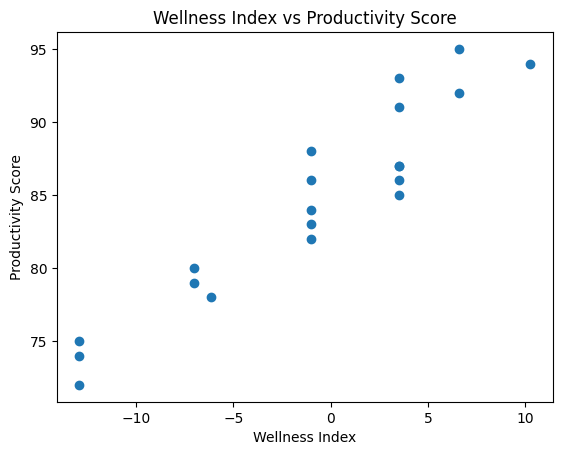

In [ ]:
plt.figure()
plt.scatter(df['WellnessIndex'], df['ProductivityScore'])
plt.xlabel('Wellness Index')
plt.ylabel('Productivity Score')
plt.title('Wellness Index vs Productivity Score')
plt.show()

In [ ]:
Employees with higher work hours combined with sufficient sleep (higher WellnessIndex) tend to
show higher productivity scores. Attendance rate shows a strong relationship with productivity,
with high attendance categories consistently outperforming low attendance groups.
Education level also influence productivity, ans suggests that experience or skill
background contributes to workplace performance.